Author: Giovanni Bignardi -- 100355842@alumnos.uc3m.es

Date: March 1, 2017



# Machine Learning

## Session #3: Classifying digits with SVM

The aim of this session is to solve a real data problem using SVM implementation of scikit-learn. The problem is based on the <a href = https://en.wikipedia.org/wiki/MNIST_database>  MNIST database</a> of handwritten digits that can be loaded from <a href = http://mldata.org> mldata.org</a>.



## Required packages:

    * numy
    * matpltlib.pyplot
    * sklearn (svm, preprocessing, cross_validation, datasets, metrics)
        . mnist = datasets.fetch_mldata('MNIST original', data_home='mnist')
        . np.fmod
        . preprocessing.scale
        . cross_validation.train_test_split
    
    

The iPython Notebook should be sent using the assignment activity module (See Aula Global). The deadline for submitting your reports ends on **March 8**. **The iPython Notebook should indicate your names and your email address**.

### 1. Loading the MNIST Database and preparing the data

* Follow the intructions provided <a href = http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_mldata.html> here</a> to download the MNIST database.
* Transform the data into a binary classification problem: even vs. odd digits.
* Divide the dataset into train (40,000) and test (30,000) datasets
* Check the number of even and odd digits in the training and test sets
* Visualize some individual images (Remember that each row of the dataset corresponds to an image)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing, cross_validation, datasets, metrics
from scipy.stats import sem #standard deviation

from sklearn.datasets.mldata import fetch_mldata

mnist = datasets.fetch_mldata('mnist-original', data_home='mnist_dataset')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
np.unique(mnist['data']) # check unique values in X data

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
#Binary transformation
x = mnist['data']
y = mnist['target']%2 == 0
np.unique(y)

array([False,  True], dtype=bool)

In [5]:
#Train/Test splitting
np.random.seed(42)
print('length of x =', len(x), 'and length of y =',len(y))
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size = 30000)
print('length of x_train =', len(x_train), 'and length of x_test =',len(x_test))

length of x = 70000 and length of y = 70000
length of x_train = 40000 and length of x_test = 30000


In [5]:
#Check the number of even and odd into y_train

# y_train
count1 = np.unique(y_train, return_counts=True)
print('\n',count1)
print('The number of odd is', count1[1][0], 'the number of even is', count1[1][1])

# y_test
count2 = np.unique(y_test, return_counts=True)
print('\n',count2)
print('The number of odd is', count2[1][0], 'the number of even is', count2[1][1])


 (array([False,  True], dtype=bool), array([20370, 19630]))
The number of odd is 20370 the number of even is 19630

 (array([False,  True], dtype=bool), array([15212, 14788]))
The number of odd is 15212 the number of even is 14788


784 70000


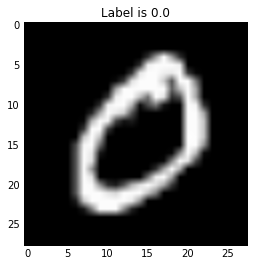

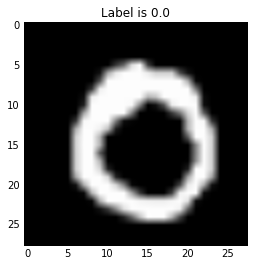

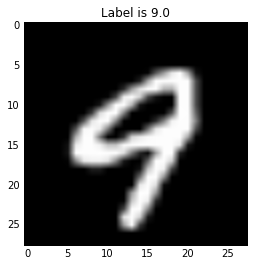

In [6]:
#plots
%matplotlib inline

print(len(mnist['data'][0]), len(mnist['target']))

for i in [0,5,69999]:
    pixel = mnist['data'][i].reshape((28,28)) #because 784 can be divided by 28
    plt.title('Label is {label}'.format(label=mnist['target'][i]))
    plt.imshow(pixel, cmap='gray')
    plt.show()

### 2. Training a Gaussian RBF SVC

On a randomly selected subset (2000 samples) of the training set, 

a) Compute the cross-validated metrics of a RBF SVC fitted with the default parameters. The simplest way to use cross-validation is to call the <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score > cross_val_score</a> helper function on the estimator and the dataset.  Adopt a 5-fold cross-validation.

b) Taking into account that standardization of datasets is a common requirement for many machine learning estimators, standardize the dataset along the feature axis and repeat step (a). You should observe a clear improvement of the cross-validation scores.

c) Based on this preprocessed subset (2000 samples), use the <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV > GridSearchCV</a>  function to performan an exhaustive search over specified parameters for the RBF SVC. The parameter space is given by values of gamma in the range [10^-3, 10^3], and C in the range [1, 10, 100, 1000]. Adopt a 5-fold cross-validation.

d) On the whole train data set:
* Train a single SVC with the best C and $\gamma$ obtained in the previous step

e) On the test data set:
* Evaluate the missclasification rate with the trained classifier. Using Scikit learn "metrics" functions give the classification report and the confusion matrix.

***
a)

In [7]:
# trying with a subset of 1000 samples
np.random.seed(42)

idx = np.random.randint(0, 39999, size=2000)

mini_x_train = x_train[idx,]
mini_y_train = y_train[idx,]

In [23]:
clf = svm.SVC(kernel='rbf')

cv = cross_validation.KFold(mini_x_train.shape[0], n_folds=5, shuffle=True, random_state=42)
scores = cross_validation.cross_val_score(clf, mini_x_train, mini_y_train, 
                                          scoring='accuracy', 
                                          cv = cv, n_jobs=-1)

print('Classification accuracy is', scores.mean(), '+/-', sem(scores)*2)

Classification accuracy is 0.5345 +/- 0.0226605383872


***
b)

In [9]:
x_train_scaled = preprocessing.scale(x_train, axis=1)

mini_x_train_scaled = x_train_scaled[idx,]

/home/gio/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [10]:
clf = svm.SVC(kernel='rbf')

cv = cross_validation.KFold(mini_x_train.shape[0], n_folds=5, shuffle=True, random_state=42)
scores = cross_validation.cross_val_score(clf, mini_x_train_scaled, mini_y_train, 
                                          scoring='accuracy', 
                                          cv = cv, n_jobs=-1)

print('Classification accuracy is', scores.mean(), '+/-', sem(scores)*2)

Classification accuracy is 0.9475 +/- 0.0132287565553


***
c) Based on this preprocessed subset (2000 samples), use the GridSearchCV function to performan an exhaustive search over specified parameters for the RBF SVC. The parameter space is given by values of gamma in the range [10^-3, 10^3], and C in the range [1, 10, 100, 1000]. Adopt a 5-fold cross-validation.

In [25]:
from sklearn.grid_search import GridSearchCV

c = [1,10,100,1000]
yy = np.logspace(-3,3, num=5)

param_grid = {'C': c, 'gamma': yy}

np.random.seed(42)
clf = GridSearchCV(svm.SVC(kernel='rbf'), 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=-1, verbose=1)

clf.fit(mini_x_train_scaled,mini_y_train)

print('With the parametes', clf.best_params_, '\ntrain score is', round(clf.best_score_,3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


With the parametes {'gamma': 0.001, 'C': 10} 
train score is 0.96


***
d)

In [26]:
clf = svm.SVC(kernel='rbf', gamma=clf.best_params_['gamma'], C=clf.best_params_['C'])
clf.fit(x_train_scaled, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

***
e)

In [27]:
y_pred = clf.predict(preprocessing.scale(x_test, axis=1))

print('Classification report:',metrics.classification_report(y_test, y_pred))

Classification report:              precision    recall  f1-score   support

      False       0.99      0.99      0.99     15212
       True       0.99      0.99      0.99     14788

avg / total       0.99      0.99      0.99     30000



/home/gio/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [29]:
print('Confusion matrix \n:',metrics.confusion_matrix(y_test,y_pred))

Confusion matrix 
: [[15033   179]
 [  163 14625]]


### 3. Training a Polynomial SVC

From Section 2, the dataset has been standardized over the feature axsis. On a randomly selected subset (2000 samples) of the training set,

a) Set $\gamma=r=1$ in the polynomial kernel and, Compute the cross-validated metrics of a Polynomial SVC fitted with the default parameters. The simplest way to use cross-validation is to call the <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score > cross_val_score</a> helper function on the estimator and the dataset.

b) Use the <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV > GridSearchCV</a>  function to performan an exhaustive search over specified parameters for the Polynomial SVC. The parameter space is given by values of C in the range [1, 10, 100, 1000], and values of M from 1 to 6. Adopt a 5-fold cross-validation.

c) On the whole train data set:
* Train a single SVC with the best C and M obtained in the previous step

d) On the test data set:
* Evaluate the missclasification rate with the trained classifier. Using Scikit learn "metrics" functions give the classification report and the confusion matrix.

I could subset another sample from train_set, like:
idx2 = np.random.randint(0, 39999, size=2000)
mini_x_train_scaled_2 = x_train_scaled[idx2,]
but I don't see how it could be useful given that I want to confront the accuracy scores

***
a)

In [10]:
clf = svm.SVC(kernel='poly', gamma=1, coef0=1)

cv = cross_validation.KFold(mini_x_train.shape[0], n_folds=5, shuffle=True, random_state=42)
scores = cross_validation.cross_val_score(clf, mini_x_train_scaled, mini_y_train, 
                                          scoring='accuracy', 
                                          cv = cv, n_jobs=-1)

print('Classification accuracy is', scores.mean(), '+/-', sem(scores)*2)

Classification accuracy is 0.966 +/- 0.0153785564992


***
b)

In [13]:
c = [1,10,100,1000]
M = np.arange(1,7,1)

param_grid = {'C': c, 'degree': M}

np.random.seed(42)
clf = GridSearchCV(svm.SVC(kernel='poly', gamma=1, coef0=1), 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=-1, verbose=1)

clf.fit(mini_x_train_scaled,mini_y_train)

print('With the parametes', clf.best_params_, '\ntrain score is', round(clf.best_score_,3))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.5min finished


With the parametes {'C': 1, 'degree': 5} 
train score is 0.968


***
c)

In [14]:
clf = svm.SVC(kernel='poly', gamma=1, coef0=1, degree=clf.best_params_['degree'], C=clf.best_params_['C'])
clf.fit(x_train_scaled, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=5, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

d)

In [15]:
y_pred = clf.predict(preprocessing.scale(x_test, axis=1))

print('classification report:\n',metrics.classification_report(y_test, y_pred))

/home/gio/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


classification report:
              precision    recall  f1-score   support

      False       0.99      0.99      0.99     15212
       True       0.99      0.99      0.99     14788

avg / total       0.99      0.99      0.99     30000



In [16]:
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[15058   154]
 [  111 14677]]


### 4. Training other classifiers

Following the same procedure above, fit a Naive Bayes Classifier and compare the results with those obtained using SVC.

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.get_params().keys()

dict_keys(['priors'])

a)

In [18]:
cv = cross_validation.KFold(mini_x_train.shape[0], n_folds=5, shuffle=True, random_state=42)
scores = cross_validation.cross_val_score(nb, mini_x_train_scaled, mini_y_train, 
                                          scoring='accuracy', 
                                          cv = cv, n_jobs=-1)


print('Classification accuracy is', scores.mean(), '+/-', sem(scores)*2)

Classification accuracy is 0.7795 +/- 0.0113357840488


***
b)

In [43]:
nb2 = GaussianNB()
nb2.fit(x_train_scaled, y_train)

GaussianNB(priors=None)

***
c)

In [44]:
y_pred = nb.predict(preprocessing.scale(x_test, axis=1))

print('classification report:\n',metrics.classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

      False       0.78      0.77      0.77     15212
       True       0.77      0.77      0.77     14788

avg / total       0.77      0.77      0.77     30000



/home/gio/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [45]:
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[11746  3466]
 [ 3394 11394]]
